In [1]:
# 1. Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearnex import patch_sklearn
patch_sklearn()

import warnings
warnings.filterwarnings("ignore")

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [2]:
# 2. Load Dataset
digits = load_digits()
X = digits.data
y = digits.target

print("Dataset Shape:")
print("X shape:", X.shape)
print("y shape:", y.shape)


Dataset Shape:
X shape: (1797, 64)
y shape: (1797,)


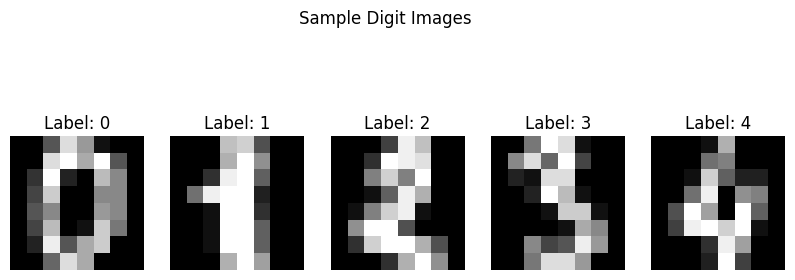

In [3]:

# 3. Visualize Few Digit Images
plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.suptitle("Sample Digit Images")
plt.show()


In [4]:

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [5]:

# 5. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:

# 6. Train KNN (K=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\nAccuracy with K=3:", accuracy)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Accuracy with K=3: 0.9666666666666667

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.97      0.95        36
           2       0.90      1.00      0.95        35
           3       1.00      0.97      0.99        37
           4       0.97      0.94      0.96        36
           5       1.00      1.00      1.00        37
           6       0.97      1.00      0.99        36
           7       0.95      0.97      0.96        36
           8       0.97      0.89      0.93        35
           9       1.00      0.92      0.96        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [7]:

# 7. Try Multiple K Values
k_values = [3,5,7,9]
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)

print("\nK vs Accuracy:")
for k, acc in zip(k_values, accuracies):
    print(f"K={k} --> Accuracy={acc}")



K vs Accuracy:
K=3 --> Accuracy=0.9666666666666667
K=5 --> Accuracy=0.9638888888888889
K=7 --> Accuracy=0.9666666666666667
K=9 --> Accuracy=0.9638888888888889


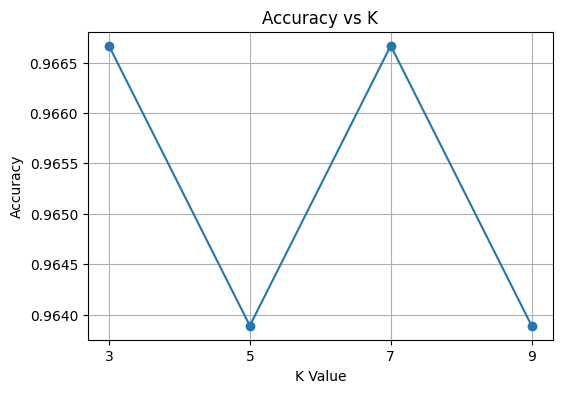

In [8]:

# 8. Plot Accuracy vs K
plt.figure(figsize=(6,4))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.xticks(k_values)
plt.grid()
plt.show()


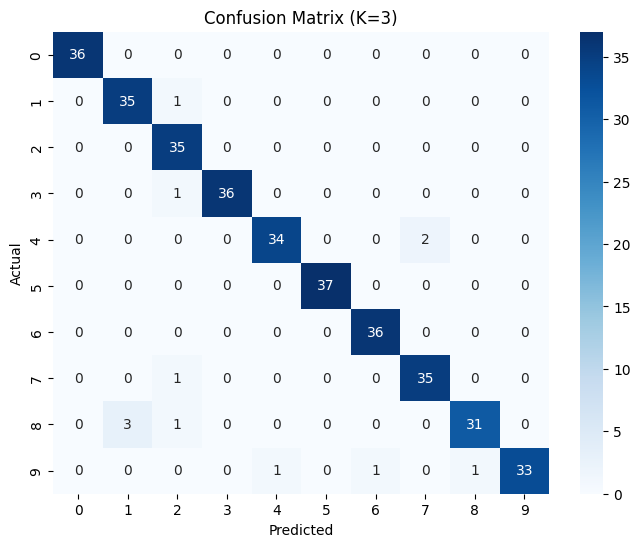

In [9]:

# 9. Confusion Matrix (Best K)
best_k = k_values[np.argmax(accuracies)]
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)
best_preds = best_model.predict(X_test)

cm = confusion_matrix(y_test, best_preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix (K={best_k})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


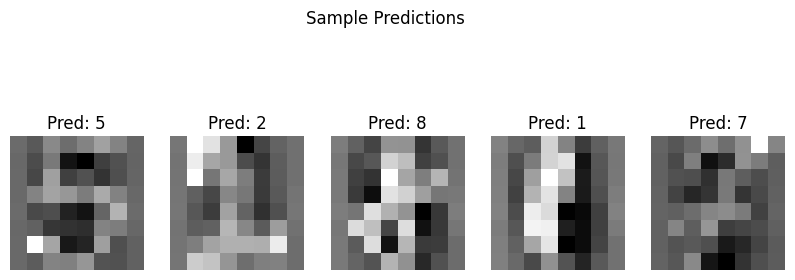

In [10]:

# 10. Display 5 Test Predictions
plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    img = X_test[i].reshape(8,8)
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {best_preds[i]}")
    plt.axis('off')
plt.suptitle("Sample Predictions")
plt.show()